# Imports


In [26]:
#basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#text process
import nltk
import unidecode
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Processamento dos dados

Como existem dados textuais podemos usar as funções já utilizadas no trabalho anterior




In [27]:
with open('./data/train.csv', encoding="utf8") as file:
    df = pd.read_csv(file)
    
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Limpeza dos textos dos tweets

Um coisa interessante de se pensar é que os dados textuais se dão através de textos escritos por pessoas em sua rede social tweeter e podem existir erros de digitação assim é importante tentar corrigir as palavras mal escritas. Para isso podemos usar a biblioteca spell checker.

In [28]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Reutilizando funções do trabalho prático

In [29]:
def remove_specials(tokens):
    return [unidecode.unidecode(word) for word in tokens]

def remove_punctuation(tokens):
    table = str.maketrans("","",string.punctuation)
    return [w.translate(table) for w in tokens]

def array_lower(tokens):
    return [w.lower() for w in tokens]

def remove_no_words(tokens):
    return [word for word in tokens if word.isalpha()]

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [w for w in tokens if not w in stop_words]

def text_clean(df_text_column, log=False):
    if log: print("Starting")

    # Dividindo texto em tokens
    df_text_column = df_text_column.apply(word_tokenize)

    if log: print("Tokens split done")  # Some log

    # Convertendo texto para minusculo
    df_text_column = df_text_column.apply(array_lower)

    if log: print("Upper letters converted to normal")

    # Removendo pontuação
    df_text_column = df_text_column.apply(remove_punctuation)

    if log: print("Removed punctiation")

    # Removendo caracteres especiais
    df_text_column = df_text_column.apply(remove_specials)

    if log: print("Specials chars removed")

    # Removendo tokens que não sao palavras
    df_text_column = df_text_column.apply(remove_no_words)

    if log: print("Removed non-words tokens")

    # Removendo tokens que são stop words
    df_text_column = df_text_column.apply(remove_stop_words)

    if log: print("Removed tokens that are stop-words\nFinished")

    return df_text_column

In [30]:
df_train = df.copy()

df_train['text'] = text_clean(df_train['text'],log=True)

Starting
Tokens split done
Upper letters converted to normal
Removed punctiation
Specials chars removed
Removed non-words tokens
Removed tokens that are stop-words
Finished


In [31]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [32]:
# Lemmização

wordnet_lemmatizer = WordNetLemmatizer()
lemmazation = lambda words: [wordnet_lemmatizer.lemmatize(tk) for tk in words]
df_train['text'] = df_train['text'].apply(lemmazation)

In [33]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deed, reason, earthquake, may, allah, forgive...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1
3,6,NaN,NaN,"[people, receive, wildfire, evacuation, order,...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

do_nothing = lambda x: x
vect_manual = TfidfVectorizer(tokenizer=do_nothing, lowercase=False, preprocessor=do_nothing, ngram_range=(1, 2),min_df=10,max_df=0.95)
freq = vect_manual.fit_transform(df_train['text'].values.tolist())
features = vect_manual.get_feature_names_out()
df_freq = pd.DataFrame(data=freq.todense(), columns=features)
df_freq.head()

,aba,aba woman,abandoned,abc,abc news,ablaze,able,absolutely,accident,accident http,...,york,young,youth,youth saved,youtube,youtube playlist,youtube video,yr,yyc,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Analise exploratoria de cada classe

Os dados possuem 2 classes são elas:

0 - Tweets sobre desastres que são fake (Não Desastre)

1 - Tweets sobre desastres que são reais (Desastre)

[Text(0, 0, 'Não Desastre'), Text(1, 0, 'Desastre')]

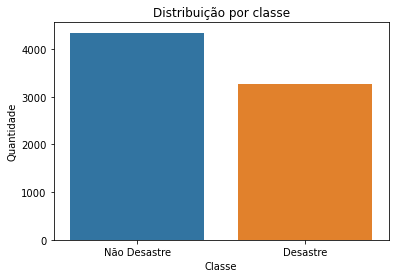

In [89]:
ax = sns.countplot(x='target',data = df)

ax.set_title('Distribuição por classe')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Classe')
ax.set_xticklabels(["Não Desastre","Desastre"])

Podemos comparar algumas caracteristicas do texto, como tamanho do texto e a quantidade de tokens geradas por cada.

Text(0.5, 1.05, 'Distribuição da quantidade de caracteres do tweet por classe')

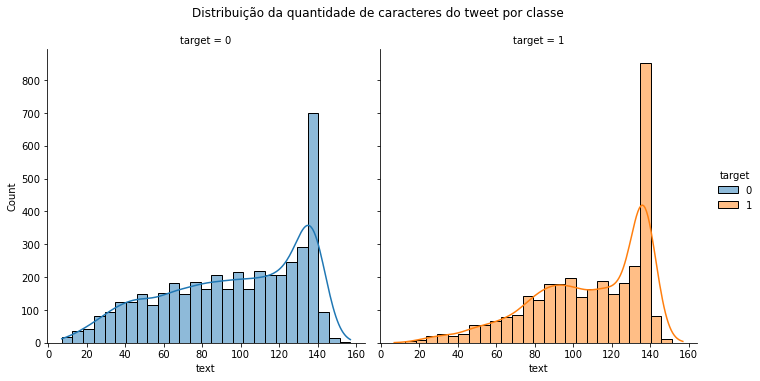

In [80]:
ax = sns.displot(x=df['text'].str.len(),data = df,col='target',hue='target',kde=True)

ax.fig.suptitle('Distribuição da quantidade de caracteres do tweet por classe',y=1.05)

Text(0.5, 1.05, 'Distribuição da quantidade de tokens do tweet por classe')

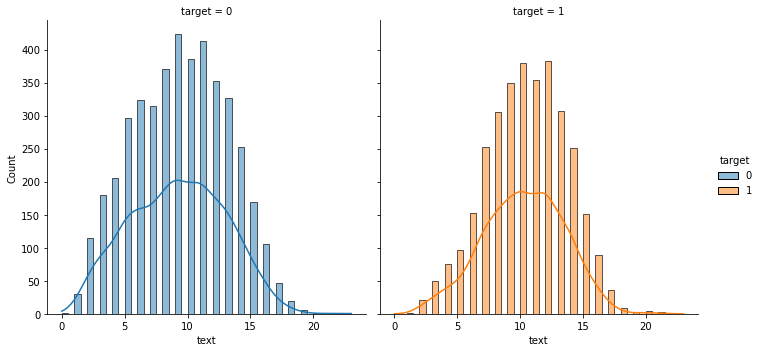

In [81]:
sns.displot(x=df_train['text'].str.len(),data = df,col='target',hue='target',kde=True)
ax.fig.suptitle('Distribuição da quantidade de tokens do tweet por classe',y=1.05)

Text(0, 0.5, 'Variancia explicada')

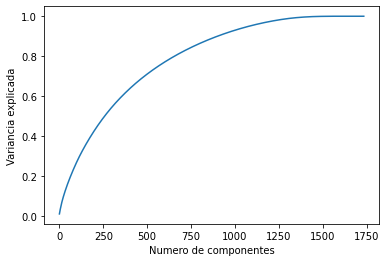

In [121]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

pca = PCA().fit(df_freq)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia explicada')

In [122]:
N_COMPONENTS = 1000
pca = TruncatedSVD(n_components=N_COMPONENTS)
pca.fit(df_freq)
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

Total variance explained: 92.84%


In [123]:
freq_reduced = pca.transform(df_freq)
N_COMPONENTS = freq_reduced.shape[1]
df_freq_reduced = pd.DataFrame(data=freq_reduced, columns=list(range(N_COMPONENTS)))
df_freq_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.058279,0.088543,-0.021763,-0.065789,0.037443,0.324253,0.053644,0.013397,-0.085869,-0.071931,...,-0.004041,-0.005560,-0.003173,-0.011972,0.008507,0.008719,-0.001785,-0.023677,-0.008806,-0.003871
1,0.049963,0.078256,0.326884,0.094822,0.003314,0.033671,-0.057924,-0.076989,0.024099,-0.088405,...,0.028670,0.019946,-0.014798,-0.044842,-0.011954,-0.035712,0.008265,-0.043091,0.024394,-0.010276
2,0.019506,0.016901,0.007476,-0.005854,0.009997,-0.017254,0.007265,-0.019348,-0.018088,-0.000556,...,-0.017562,0.005765,0.040611,-0.026601,0.004450,0.028302,-0.014544,0.018851,-0.003344,0.033993
3,0.053702,0.033352,0.087593,0.021263,0.013559,-0.026121,0.042709,-0.073847,-0.081027,0.064685,...,-0.013601,0.016397,-0.008545,-0.003453,0.006270,0.026832,0.014296,0.013641,-0.011752,0.017397
4,0.039933,0.056049,0.027209,0.005661,-0.005612,-0.003993,0.011392,-0.028392,-0.018980,0.051452,...,0.010873,0.022633,0.015654,0.000727,0.033173,-0.013951,-0.006331,0.029828,-0.000170,-0.009383


# Classificadores

## Pipeline cria um pipeline para um classificador

## Knn

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3,5,7,11,13]}

clf = GridSearchCV(KNeighborsClassifier(), params, n_jobs = -1)
clf.fit(df_freq_reduced, df['target'])

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 13]})

In [126]:
clf.best_params_

{'n_neighbors': 3}

In [129]:
with open('./data/test.csv', encoding="utf8") as file:
    df_test = pd.read_csv(file)
    
df_test['text'] = text_clean(df_test['text'])
df_test['text'] = df_test['text'].apply(lemmazation)

freq_test = vect_manual.fit_transform(df_test['text'].values.tolist())
features_test = vect_manual.get_feature_names_out()
df_freq_test = pd.DataFrame(data=freq.todense(), columns=features)
df_freq_test.head()

,aba,aba woman,abandoned,abc,abc news,ablaze,able,absolutely,accident,accident http,...,york,young,youth,youth saved,youtube,youtube playlist,youtube video,yr,yyc,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
freq_reduced_test = pca.transform(df_freq_test)
N_COMPONENTS = freq_reduced.shape[1]
df_freq_reduced_test = pd.DataFrame(data=freq_reduced_test, columns=list(range(N_COMPONENTS)))
df_freq_reduced_test.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.058279,0.088543,-0.021763,-0.065789,0.037443,0.324253,0.053644,0.013397,-0.085869,-0.071931,...,-0.004041,-0.005560,-0.003173,-0.011972,0.008507,0.008719,-0.001785,-0.023677,-0.008806,-0.003871
1,0.049963,0.078256,0.326884,0.094822,0.003314,0.033671,-0.057924,-0.076989,0.024099,-0.088405,...,0.028670,0.019946,-0.014798,-0.044842,-0.011954,-0.035712,0.008265,-0.043091,0.024394,-0.010276
2,0.019506,0.016901,0.007476,-0.005854,0.009997,-0.017254,0.007265,-0.019348,-0.018088,-0.000556,...,-0.017562,0.005765,0.040611,-0.026601,0.004450,0.028302,-0.014544,0.018851,-0.003344,0.033993
3,0.053702,0.033352,0.087593,0.021263,0.013559,-0.026121,0.042709,-0.073847,-0.081027,0.064685,...,-0.013601,0.016397,-0.008545,-0.003453,0.006270,0.026832,0.014296,0.013641,-0.011752,0.017397
4,0.039933,0.056049,0.027209,0.005661,-0.005612,-0.003993,0.011392,-0.028392,-0.018980,0.051452,...,0.010873,0.022633,0.015654,0.000727,0.033173,-0.013951,-0.006331,0.029828,-0.000170,-0.009383


In [131]:
y_predicted = clf.predict(df_freq_reduced_test)
y_predicted

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(df['target'], y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      4342
           1       0.91      0.62      0.74      3271

    accuracy                           0.81      7613
   macro avg       0.84      0.79      0.80      7613
weighted avg       0.83      0.81      0.80      7613

